In [ ]:
import requests
from bs4 import BeautifulSoup #parsowanie stron internetowych, wyciaganie danych ze stron internetowych
from PIL import Image #biblioteka ktora pracuje ze zdjeciami, zapisuje itp
from io import BytesIO  #input/output  jak podmay zestaw bytow bedzie dzialalo jak z dysku
import os
import random #do randomowego dzielenie zdjec na treningowe i tetsowe

In [ ]:
gender = 'mezczyzna'
category = 'kurtki-meskie'
page_number = 1

url = f'https://www.e-horyzont.pl/{gender}/{category}.html?p={page_number}'





In [ ]:
response = requests.get(url)
content = response.content
#pobiera strone
 #przypisujemy strone

In [ ]:
print(content)

b'<!doctype html>\n<html lang="pl">\n<head >\n    <meta charset="utf-8"/><script type="text/javascript">(window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.eu01.nr-data.net"]},distributed_tracing:{enabled:true}};(window.NREUM||(NREUM={})).loader_config={agentID:"322540553",accountID:"3328930",trustKey:"3328930",xpid:"VwUFWV9QCBACUlVUAQkCVl0=",licenseKey:"NRJS-d38aa680cdb2726940c",applicationID:"264668509"};;(()=>{var e,t,r={9071:(e,t,r)=>{"use strict";r.d(t,{I:()=>n});var n=0,i=navigator.userAgent.match(/Firefox[\\/\\s](\\d+\\.\\d+)/);i&&(n=+i[1])},8768:(e,t,r)=>{"use strict";r.d(t,{T:()=>n,p:()=>i});const n=/(iPad|iPhone|iPod)/g.test(navigator.userAgent),i=n&&Boolean("undefined"==typeof SharedWorker)},27:(e,t,r)=>{"use strict";r.d(t,{P_:()=>g,Mt:()=>v,C5:()=>d,DL:()=>y,OP:()=>I,lF:()=>k,Yu:()=>E,Dg:()=>p,CX:()=>f,GE:()=>w,sU:()=>P});var n={};r.r(n),r.d(n,{agent:()=>A,match:()=>D,version:()=>x});var i=r(6797),o=r(909),a=r(8610);class s{constructor(e,t)

In [ ]:
soup = BeautifulSoup(content, 'html.parser')  #parsujemy widok strony

In [ ]:
print(soup.prettify())  #pokazujemy content uproszczony

<!DOCTYPE html>
<html lang="pl">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.eu01.nr-data.net"]},distributed_tracing:{enabled:true}};(window.NREUM||(NREUM={})).loader_config={agentID:"322540553",accountID:"3328930",trustKey:"3328930",xpid:"VwUFWV9QCBACUlVUAQkCVl0=",licenseKey:"NRJS-d38aa680cdb2726940c",applicationID:"264668509"};;(()=>{var e,t,r={9071:(e,t,r)=>{"use strict";r.d(t,{I:()=>n});var n=0,i=navigator.userAgent.match(/Firefox[\/\s](\d+\.\d+)/);i&&(n=+i[1])},8768:(e,t,r)=>{"use strict";r.d(t,{T:()=>n,p:()=>i});const n=/(iPad|iPhone|iPod)/g.test(navigator.userAgent),i=n&&Boolean("undefined"==typeof SharedWorker)},27:(e,t,r)=>{"use strict";r.d(t,{P_:()=>g,Mt:()=>v,C5:()=>d,DL:()=>y,OP:()=>I,lF:()=>k,Yu:()=>E,Dg:()=>p,CX:()=>f,GE:()=>w,sU:()=>P});var n={};r.r(n),r.d(n,{agent:()=>A,match:()=>D,version:()=>x});var i=r(6797),o=r(909),a=r(8610);class s{constructor(e,t){try{

In [ ]:
imgs = soup.find_all('img', {'class': 'object-contain max-h-full'}) #img to znacznik pierwszy po < w widoku strony, class to nazwa klasy

In [ ]:
imgs[2]

<img @update-gallery-163642.window="$root.src = $event.detail" alt="Męska kurtka wiatroszczelna Silvini Monsano olive" class="object-contain max-h-full" height="360" loading="lazy" src="https://www.e-horyzont.pl/media/catalog/product/cache/d780c349b1105171fd361f9d8dbd3513/3/d/3d5de7d6955c4f4a9bf4496f118637eb02feb705_silvini_monsano_mj2010_olive1.jpg" title="Męska kurtka wiatroszczelna Silvini Monsano olive" width="360" x-data=""/>

In [ ]:
#wyciąganie adresów url dla wszystkich stron
urls = [img['src'] for img in imgs]

In [ ]:
response = requests.get(urls[1])
content = response.content

In [ ]:
urls

['https://www.e-horyzont.pl/media/catalog/product/cache/d780c349b1105171fd361f9d8dbd3513/0/0/00b27546a9b6337e42a337b63e6f523c13d780b6_iat_hellyhansen_65698_597_front_x_0001.jpg',
 'https://www.e-horyzont.pl/media/catalog/product/cache/d780c349b1105171fd361f9d8dbd3513/7/b/7b2871e08d22b5cd49b93b4cb3633a7c440aae52_hh_m_powjumper_wood_green_1.jpg',
 'https://www.e-horyzont.pl/media/catalog/product/cache/d780c349b1105171fd361f9d8dbd3513/3/d/3d5de7d6955c4f4a9bf4496f118637eb02feb705_silvini_monsano_mj2010_olive1.jpg',
 'https://www.e-horyzont.pl/media/catalog/product/cache/d780c349b1105171fd361f9d8dbd3513/e/9/e9dd8834083e9f9e226395eeae082a2b93fd9c89_silvini_monsano_mj2010_black.jpg',
 'https://www.e-horyzont.pl/media/catalog/product/cache/d780c349b1105171fd361f9d8dbd3513/c/e/ced75278867eab2275b08654c945a552ba7e42fe_silvini_m_vetta_orange.jpg',
 'https://www.e-horyzont.pl/media/catalog/product/cache/d780c349b1105171fd361f9d8dbd3513/a/2/a29f6ef5b22a597b02eda0aa0a530a63881e6e44_rab_m_borealis_ja

In [ ]:
img = Image.open(BytesIO(content))

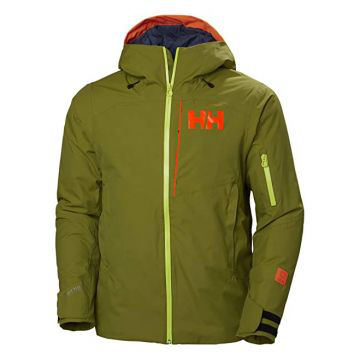

In [ ]:
img

In [ ]:
url = urls[0]
url.split('/')[-1].split('.')[0] + '.jpg'   #tworzenie nazwy pliku który bedzie zapisywany na podstawie nazwy strony internetowej

'00b27546a9b6337e42a337b63e6f523c13d780b6_iat_hellyhansen_65698_597_front_x_0001.jpg'

In [ ]:
#funckaj wyciaga strone
def get_page(gender,
             category,
             page_number):
  
  url = f'https://www.e-horyzont.pl/{gender}/{category}.html?p={page_number}'
  try:
    response = requests.get(url)
    content = response.content
    return content
  except:#jezeli nie znajdzie to robi to co ponizsze (w tym przypadku drukuje fail, ale mozna zrobic pass i wtedy leci dalej)
    print('Fail')

#funkcja parsuje strone internetowa
def parse_imgs_url(content):
  soup = BeautifulSoup(content, 'html.parser')
  imgs = soup.find_all('img', {'class': 'object-contain max-h-full'})
  return [img['src'] for img in imgs]




#zapis pliku do konkretnej sciezki w konkretną nazwą

def get_image(url, path, category):
  try:
    response = requests.get(url)
    content = response.content
    img = Image.open(BytesIO(content))
    file_name = url.split('/')[-1].split('.')[0] + '.jpg'
    os.makedirs(f'{path}/{category}', exist_ok=True)  #tworzy folder, exist_ok nie wywala jezeli folder juz istnieje
    img.save(f'{path}/{category}/{file_name}')
  except:
    print('Fail')




#funkcja ktora pobiera obrazki (finalna)
def get_data(gender,
             category,
             start_page,
             end_page,
             path):
  
  for page_number in range(start_page, end_page + 1):
    content = get_page(gender, category, page_number)
    urls = parse_imgs_url(content)

    
    for i, url in enumerate(urls):
      get_image(url, path, category)
      if i % 20 == 0: #enumerate zwraca tez index jaki i w tym przypadku
        print(f'Downloaded {i} for page {page_number} from {category}') #sprawdzamy czy wszytko idzie ok

In [ ]:
from google.colab import drive  #instalowanie dostepu do dysku google
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = 'drive/MyDrive/vision_project_3/data/train'  #pobieranie danych do folderu treningowego
get_data('mezczyzna','kurtki-meskie',1,5,data_path)  #ograniczamy sie do 5 stron
get_data('mezczyzna','spodnie-meskie',1,5,data_path)
get_data('mezczyzna','czapki-i-kapelusze-meskie',1,5,data_path)
get_data('mezczyzna','t-shirty-i-topy-meskie',1,5,data_path)

Downloaded 0 for page 1 from kurtki-meskie
Downloaded 20 for page 1 from kurtki-meskie
Downloaded 40 for page 1 from kurtki-meskie
Downloaded 0 for page 2 from kurtki-meskie
Downloaded 20 for page 2 from kurtki-meskie
Downloaded 40 for page 2 from kurtki-meskie
Downloaded 0 for page 3 from kurtki-meskie
Downloaded 20 for page 3 from kurtki-meskie
Downloaded 40 for page 3 from kurtki-meskie
Downloaded 0 for page 4 from kurtki-meskie
Downloaded 20 for page 4 from kurtki-meskie
Downloaded 40 for page 4 from kurtki-meskie
Downloaded 0 for page 5 from kurtki-meskie
Downloaded 20 for page 5 from kurtki-meskie
Downloaded 40 for page 5 from kurtki-meskie
Downloaded 0 for page 1 from spodnie-meskie
Downloaded 20 for page 1 from spodnie-meskie
Downloaded 40 for page 1 from spodnie-meskie
Downloaded 0 for page 2 from spodnie-meskie
Downloaded 20 for page 2 from spodnie-meskie
Downloaded 40 for page 2 from spodnie-meskie
Downloaded 0 for page 3 from spodnie-meskie
Downloaded 20 for page 3 from spo

In [ ]:
#przerzucam częśc danych do z folderu train do folderu test

data_path = 'drive/MyDrive/vision_project_3/data'
os.makedirs(data_path + '/test', exist_ok=True)  #tworzymy folder
test_size = 0.2  #przenosimy 20% z treningowego do testowego

for category in ['kurtki-meskie', 'spodnie-meskie', 'czapki-i-kapelusze-meskie', 't-shirty-i-topy-meskie']:
  os.makedirs(data_path + '/test/' + category, exist_ok=True)  #tworzy folder
  file_list = os.listdir(data_path + '/train/' + category)  #listdir wylistowuje
  number_of_samples = int(len(file_list) * test_size)  #wyliczmay 20%
  for file_name in random.sample(file_list, number_of_samples) : #lista 100 losowo wybranych zdjec z 1szej subcategorii
    os.rename(data_path + '/train/' + category + '/' + file_name,   #stara nazwa pliku zamieniona na nową poniżej, rename przenosi :)
              data_path + '/test/' + category + '/' + file_name)

In [ ]:
len(os.listdir(data_path + '/train/spodnie-meskie'))

192

In [ ]:
len(os.listdir(data_path + '/test/spodnie-meskie'))

48

#Przygotowanie modelu

In [ ]:
from tensorflow import keras

In [ ]:

batch_size = 128
img_height = 128 
img_width = 128

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    data_path + '/train',
    validation_split = 0.2,  #zbiór validacyjny 20%
    seed=0, #to samo co random_state
    subset='training', #wg dokumentacji, bierzemy training zbiór
    image_size = (img_height, img_width),
    batch_size = batch_size, #przypisalismy parametr z taką sama nazwą :)
    label_mode = 'categorical', #wg dokumentacji, bo mamy kategorie
)


val_ds = keras.utils.image_dataset_from_directory(
    data_path + '/train',
    validation_split = 0.2,  #zbiór validacyjny 20%
    seed=0, #to samo co random_state, dzieki temu zbiory beda rozne
    subset='validation', #wg dokumentacji, bierzemy validacyjny zbiór teraz
    image_size = (img_height, img_width),
    batch_size = batch_size, #przypisalismy parametr z taką sama nazwą :)
    label_mode = 'categorical', #wg dokumentacji, bo mamy kategorie
)

Found 768 files belonging to 4 classes.
Using 615 files for training.
Found 768 files belonging to 4 classes.
Using 153 files for validation.


In [ ]:
train_ds.class_names

['czapki-i-kapelusze-meskie',
 'kurtki-meskie',
 'spodnie-meskie',
 't-shirty-i-topy-meskie']

In [ ]:
val_ds.class_names

['czapki-i-kapelusze-meskie',
 'kurtki-meskie',
 'spodnie-meskie',
 't-shirty-i-topy-meskie']

In [ ]:
for image, label in train_ds:
  print(image.shape)  #(batch size128 i 128x128, 3 bo RGB, czyli shape ma 128x128x3 dla zdjęc kolorowych)
  print(label.shape)  #(128 labels, 4 to nie pamietam co)

(128, 128, 128, 3)
(128, 4)
(128, 128, 128, 3)
(128, 4)
(128, 128, 128, 3)
(128, 4)
(128, 128, 128, 3)
(128, 4)
(103, 128, 128, 3)
(103, 4)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
#budujemy model

model = Sequential()
model.add(layers.Rescaling(1/255))  #wartość kazdego piksela zmieni na od 0 do 1 bo RGB ma wartosci od 0 do 255
model.add(layers.Conv2D(23, #ilośc filtrów
                        (3,3),#kernel
                        input_shape = (img_width, img_height, 3), #input shape musi byc  wpierwszej warstwie
                        padding='same',
                        activation='relu'
                        ))
model.add(layers.MaxPool2D((2,2)))  #obraz 64x64 bedzie

model.add(layers.Conv2D(16, #ilośc filtrów
                        (3,3),#kernel
                        padding='same',
                        activation='relu'
                        ))
model.add(layers.MaxPool2D((2,2))) #obraz 32x32 bedzie

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))  #softmax bo klasyfikacja, 4 bo 4 klasy

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10,
    batch_size = batch_size
)

Epoch 1/10
5/5 [==============================] - 13s 283ms/step - loss: 1.6318 - accuracy: 0.3366 - val_loss: 1.2497 - val_accuracy: 0.3856
Epoch 2/10
5/5 [==============================] - 1s 94ms/step - loss: 1.2116 - accuracy: 0.4797 - val_loss: 1.1141 - val_accuracy: 0.7190
Epoch 3/10
5/5 [==============================] - 1s 100ms/step - loss: 0.9591 - accuracy: 0.8016 - val_loss: 0.7581 - val_accuracy: 0.7778
Epoch 4/10
5/5 [==============================] - 1s 93ms/step - loss: 0.6397 - accuracy: 0.8000 - val_loss: 0.6187 - val_accuracy: 0.7190
Epoch 5/10
5/5 [==============================] - 1s 100ms/step - loss: 0.4973 - accuracy: 0.7919 - val_loss: 0.4281 - val_accuracy: 0.8693
Epoch 6/10
5/5 [==============================] - 1s 116ms/step - loss: 0.3578 - accuracy: 0.8927 - val_loss: 0.4531 - val_accuracy: 0.8170
Epoch 7/10
5/5 [==============================] - 1s 103ms/step - loss: 0.3015 - accuracy: 0.9024 - val_loss: 0.3318 - val_accuracy: 0.8889
Epoch 8/10
5/5 [=====

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
os.listdir(data_path + '/test/kurtki-meskie')

['873478bf7cfcb439377717fc921323f43d5de039_hh_m_newport_regatta_jkt_orng.jpg',
 '7cf677509db0e6ffcb971f73f28c12141457466e_m_pier_jckt_azid_lime.jpg',
 'd81c13e284a61d1ffece63ed44d1ee737982d01f_hh_loke_jkt_m_deep_fjord_1.jpg',
 '95b50c447eb34012c9c9758efceb9d1044b78d8c_bd_strmlne_strtch_rain_shl_m_optyllw.jpg',
 '0601cd23567115b9c32476dfdafb78931060a520_nano_air_m_light_hybrid_hoody_black.jpg',
 '3a0d05c18ea242e7503a7bab9ea7d91e0f52a82d_heather_canyon_jacket_black.jpg',
 '23c6689b8fed6646d62cba9ac6b25c2124bfb54a_1307561_6000_0.jpg',
 '05ffcafbb899e743cadf74d3328dba1ba17d7de0_1115781_5153_0.jpg',
 '25ba6b95e079d0452b727bf3598d29deda215ce1_1108372_6230_0.jpg',
 'd4bfafd6670d56541dfed701f3ea9f799af262cf_1108372_2193_0.jpg',
 '22406d3f0d72fdf661268b18e488b2a52a6e4e4d_1108372_1278_0.jpg',
 '512d81a7205339a9e2246dd45155966f143a1f9e_1306922_2193_0.jpg',
 'de089548f683607f751f0bb586539ec37a837c36_1115131_1274_0.jpg',
 '65bb379c5a72466524689c4e121bd8293d7b78f2_hh_m_juel_3in1_jacket_black_9.jpg',

In [ ]:
filename = '424ce0a742a049027c436580904fbdfb1a16c134_1111142_1010_0.jpg'

In [ ]:
img = cv2.imread(data_path + '/test/kurtki-meskie/' + filename)

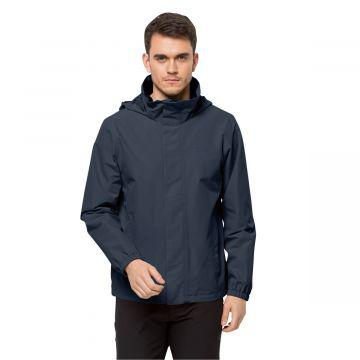

In [ ]:
cv2_imshow(img)

In [ ]:
resized = cv2.resize(img, (img_width, img_height))

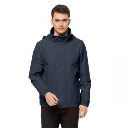

In [ ]:
cv2_imshow(resized)

In [ ]:
import numpy as np

In [ ]:
model.predict(np.array([resized])) #predykcja na podstawie zdjęcia za zbioru testowego

1/1 [==============================] - 0s 163ms/step


array([[1.1861708e-03, 9.9591309e-01, 1.2543231e-05, 2.8882385e-03]],
      dtype=float32)

In [ ]:
train_ds.class_names

['czapki-i-kapelusze-meskie',
 'kurtki-meskie',
 'spodnie-meskie',
 't-shirty-i-topy-meskie']

In [ ]:
pred = model.predict(np.array([resized])).argmax(axis=1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
train_ds.class_names[pred[0]] #wynik predykcji

'kurtki-meskie'